In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed
#import umap
import pandas as pd

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir

In [4]:
DATASET_ID = 'bengalese_finch_sober'

In [5]:
from avgn.utils.hparams import HParams
from avgn.dataset import DataSet

In [6]:
from avgn.signalprocessing.create_spectrogram_dataset import prepare_wav, create_label_df, get_row_audio

### create dataset

In [7]:
hparams = HParams(
    num_mel_bins = 32,
    mel_lower_edge_hertz=500,
    mel_upper_edge_hertz=15000,
    butter_lowcut = 500,
    butter_highcut = 15000,
    ref_level_db = 20,
    min_level_db = -25,
    mask_spec = True,
    win_length_ms = 10,
    hop_length_ms = 2,
    nex=-1,
    n_jobs=-1,
    verbosity = 1,
)

In [8]:
# create a dataset object
dataset = DataSet(DATASET_ID, hparams = hparams)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 163 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 1790 tasks      | elapsed:   21.7s


[Parallel(n_jobs=-1)]: Done 2663 out of 2663 | elapsed:   23.5s finished


In [9]:
dataset.sample_json

OrderedDict([('species', 'Lonchura striata domestica'),
             ('common_name', 'Bengalese finch'),
             ('indvs',
              OrderedDict([('gr41rd51',
                            OrderedDict([('syllables',
                                          OrderedDict([('start_times',
                                                        [1.05825,
                                                         2.0581875,
                                                         2.2345,
                                                         2.43575,
                                                         2.597875,
                                                         2.79425,
                                                         2.95409375,
                                                         3.12025,
                                                         3.27378125,
                                                         3.45621875,
                                   

In [10]:
len(dataset.data_files)

2663

#### Create dataset based upon JSON

In [11]:
from joblib import Parallel, delayed
n_jobs = -1; verbosity = 10

In [12]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    syllable_dfs = parallel(
        delayed(create_label_df)(
            dataset.data_files[key].data,
            hparams=dataset.hparams,
            labels_to_retain=['labels'],
            unit="syllables",
            dict_features_to_retain = [],
            key = key,
        )
        for key in tqdm(dataset.data_files.keys())
    )
syllable_df = pd.concat(syllable_dfs)
len(syllable_df)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1969s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 262 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 308 ta

[Parallel(n_jobs=-1)]: Done 2616 out of 2663 | elapsed:   27.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 2663 out of 2663 | elapsed:   27.2s finished


215663

In [13]:
syllable_df[:3]

start_time  end_time labels      indv  indvi  \
0    1.058250  1.089219      i  gr41rd51      0   
1    2.058187  2.117165      i  gr41rd51      0   
2    2.234500  2.285938      i  gr41rd51      0   

                                                 key  
0  gr41rd51__3part_SYLc_th4191_belowhits_220612_1...  
1  gr41rd51__3part_SYLc_th4191_belowhits_220612_1...  
2  gr41rd51__3part_SYLc_th4191_belowhits_220612_1...

### get audio for dataset

In [14]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    syllable_dfs = parallel(
        delayed(get_row_audio)(
            syllable_df[syllable_df.key == key], 
            dataset.data_files[key].data['wav_loc'], 
            dataset.hparams
        )
        for key in tqdm(syllable_df.key.unique())
    )
syllable_df = pd.concat(syllable_dfs)
len(syllable_df)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:  

[Parallel(n_jobs=-1)]: Done 2663 out of 2663 | elapsed:  1.3min finished


215663

In [15]:
df_mask  = np.array([len(i) > 0 for i in tqdm(syllable_df.audio.values)])

In [16]:
syllable_df = syllable_df[np.array(df_mask)]

In [17]:
syllable_df[:3]

start_time  end_time labels      indv  indvi  \
0    1.058250  1.089219      i  gr41rd51      0   
1    2.058187  2.117165      i  gr41rd51      0   
2    2.234500  2.285938      i  gr41rd51      0   

                                                 key  \
0  gr41rd51__3part_SYLc_th4191_belowhits_220612_1...   
1  gr41rd51__3part_SYLc_th4191_belowhits_220612_1...   
2  gr41rd51__3part_SYLc_th4191_belowhits_220612_1...   

                                               audio   rate  
0  [0.007913239165468156, 0.0037091146820381962, ...  32000  
1  [0.00014151214217988928, 0.012034455962893091,...  32000  
2  [0.00494844192331757, 0.0035751168362886526, 0...  32000

In [18]:
sylls = syllable_df.audio.values

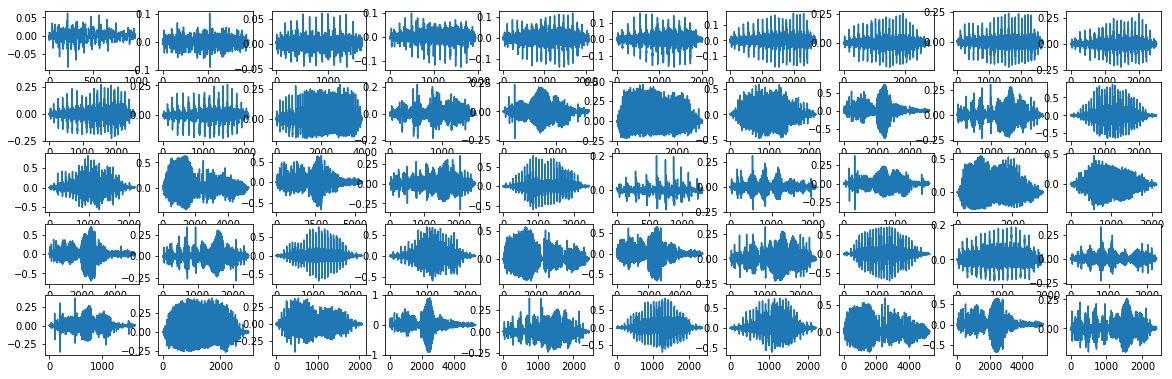

In [19]:
nrows = 5
ncols = 10
zoom = 2
fig, axs = plt.subplots(ncols=ncols, nrows = nrows,figsize = (ncols*zoom, nrows+zoom/1.5))
for i, syll in tqdm(enumerate(sylls), total = nrows*ncols):
    ax = axs.flatten()[i]
    ax.plot(syll)
    if i == nrows*ncols -1:
        break

In [20]:
syllable_df['audio'] = [i/np.max(i) for i in syllable_df.audio.values]

### Create spectrograms

In [21]:
from avgn.visualization.spectrogram import draw_spec_set
from avgn.signalprocessing.create_spectrogram_dataset import make_spec, mask_spec, log_resize_spec, pad_spectrogram

In [22]:
syllables_wav = syllable_df.audio.values
syllables_rate = syllable_df.rate.values

In [23]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    # create spectrograms
    syllables_spec = parallel(
        delayed(make_spec)(
            syllable,
            rate,
            hparams=dataset.hparams,
            mel_matrix=dataset.mel_matrix,
            use_mel=True,
            use_tensorflow=False,
        )
        for syllable, rate in tqdm(
            zip(syllables_wav, syllables_rate),
            total=len(syllables_rate),
            desc="getting syllable spectrograms",
            leave=False,
        )
    )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1925s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0507s.) Setting batch_size=14.
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 107 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1368s.) Setting batch_size=40.
[Parallel(n_jobs=-1)]: Done 383 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 649 tasks      | elapsed

[Parallel(n_jobs=-1)]: Done 215663 out of 215663 | elapsed:  1.0min finished


### Rescale spectrogram
- using log rescaling

In [24]:
log_scaling_factor = 4

In [25]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    syllables_spec = parallel(
        delayed(log_resize_spec)(spec, scaling_factor=log_scaling_factor)
        for spec in tqdm(syllables_spec, desc="scaling spectrograms", leave=False)
    )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0119s.) Setting batch_size=32.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1965s.) Setting batch_size=64.
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 592 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1648 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 2736 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 3952 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 5168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 6512 tasks      | elapsed:    1.3s
[Para

[Parallel(n_jobs=-1)]: Done 215663 out of 215663 | elapsed:   33.3s finished


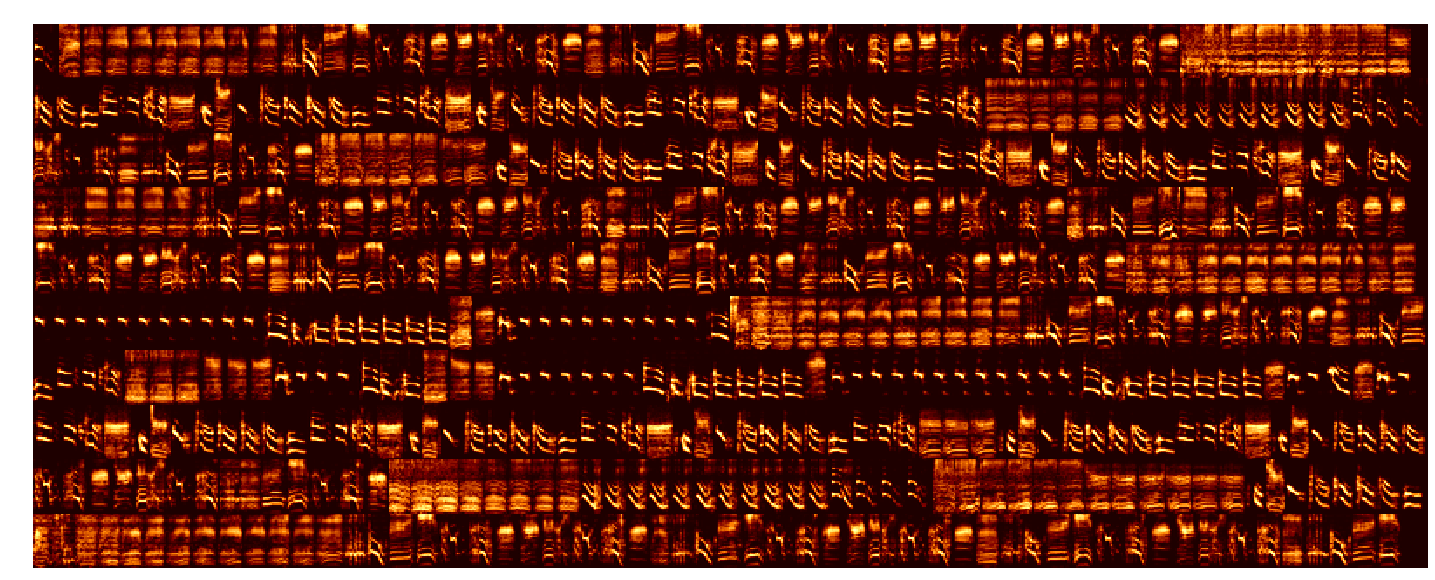

In [26]:
draw_spec_set(syllables_spec, zoom=1, maxrows=10, colsize=25)

### Pad spectrograms

In [27]:
syll_lens = [np.shape(i)[1] for i in syllables_spec]
pad_length = np.max(syll_lens)

In [28]:
syllable_df[:3]

start_time  end_time labels      indv  indvi  \
0    1.058250  1.089219      i  gr41rd51      0   
1    2.058187  2.117165      i  gr41rd51      0   
2    2.234500  2.285938      i  gr41rd51      0   

                                                 key  \
0  gr41rd51__3part_SYLc_th4191_belowhits_220612_1...   
1  gr41rd51__3part_SYLc_th4191_belowhits_220612_1...   
2  gr41rd51__3part_SYLc_th4191_belowhits_220612_1...   

                                               audio   rate  
0  [0.1282839208145484, 0.060129583374536714, -0....  32000  
1  [0.001372438327434829, 0.11671470983956538, 0....  32000  
2  [0.07955982096485743, 0.05747984109569571, 0.0...  32000

In [29]:
import seaborn as sns

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


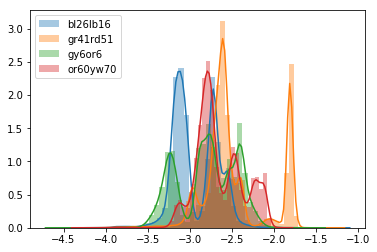

In [30]:
for indv in np.unique(syllable_df.indv):
    sns.distplot(np.log(syllable_df[syllable_df.indv==indv]["end_time"] - syllable_df[syllable_df.indv==indv]["start_time"]), label=indv)
plt.legend()

In [31]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:

    syllables_spec = parallel(
        delayed(pad_spectrogram)(spec, pad_length)
        for spec in tqdm(
            syllables_spec, desc="padding spectrograms", leave=False
        )
    )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0808s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0201s.) Setting batch_size=78.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1165s.) Setting batch_size=266.
[Parallel(n_jobs=-1)]: Done 380 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1082 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 3444 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 6370 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 9828 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 13286 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 17276 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 21266 tasks    

[Parallel(n_jobs=-1)]: Done 215663 out of 215663 | elapsed:   23.5s finished


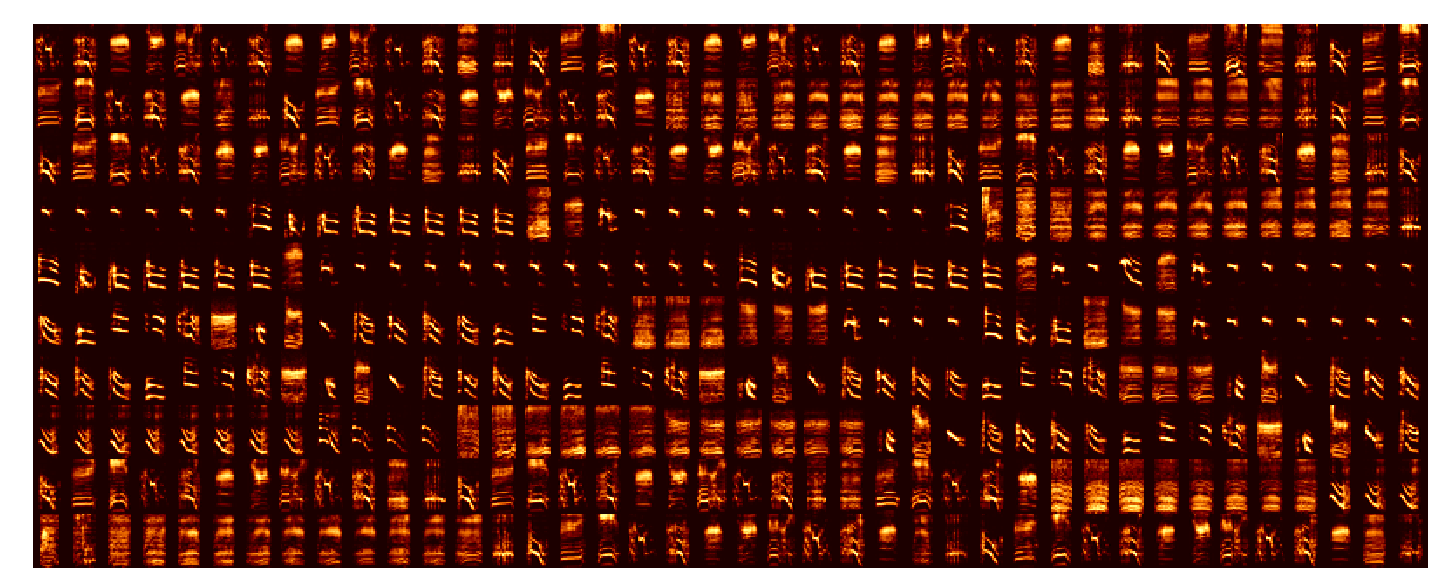

In [32]:
draw_spec_set(syllables_spec, zoom=1, maxrows=10, colsize=25)

In [33]:
np.shape(syllables_spec)

(215663, 32, 20)

In [34]:
def norm(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))
syllables_spec = [(norm(i)*255).astype('uint8') for i in tqdm(syllables_spec)]

In [35]:
# convert to uint8 to save space
syllable_df['spectrogram'] = syllables_spec

In [36]:
syllable_df[:3]

start_time  end_time labels      indv  indvi  \
0    1.058250  1.089219      i  gr41rd51      0   
1    2.058187  2.117165      i  gr41rd51      0   
2    2.234500  2.285938      i  gr41rd51      0   

                                                 key  \
0  gr41rd51__3part_SYLc_th4191_belowhits_220612_1...   
1  gr41rd51__3part_SYLc_th4191_belowhits_220612_1...   
2  gr41rd51__3part_SYLc_th4191_belowhits_220612_1...   

                                               audio   rate  \
0  [0.1282839208145484, 0.060129583374536714, -0....  32000   
1  [0.001372438327434829, 0.11671470983956538, 0....  32000   
2  [0.07955982096485743, 0.05747984109569571, 0.0...  32000   

                                         spectrogram  
0  [[5, 5, 5, 5, 3, 25, 26, 75, 105, 80, 47, 16, ...  
1  [[4, 4, 4, 4, 16, 8, 6, 11, 7, 3, 3, 14, 51, 2...  
2  [[2, 2, 2, 3, 0, 26, 49, 12, 9, 2, 2, 93, 68, ...

### view syllables per indv

In [37]:
syllable_df.indv.unique()

array(['gr41rd51', 'or60yw70', 'gy6or6', 'bl26lb16'], dtype=object)

bl26lb16 70701


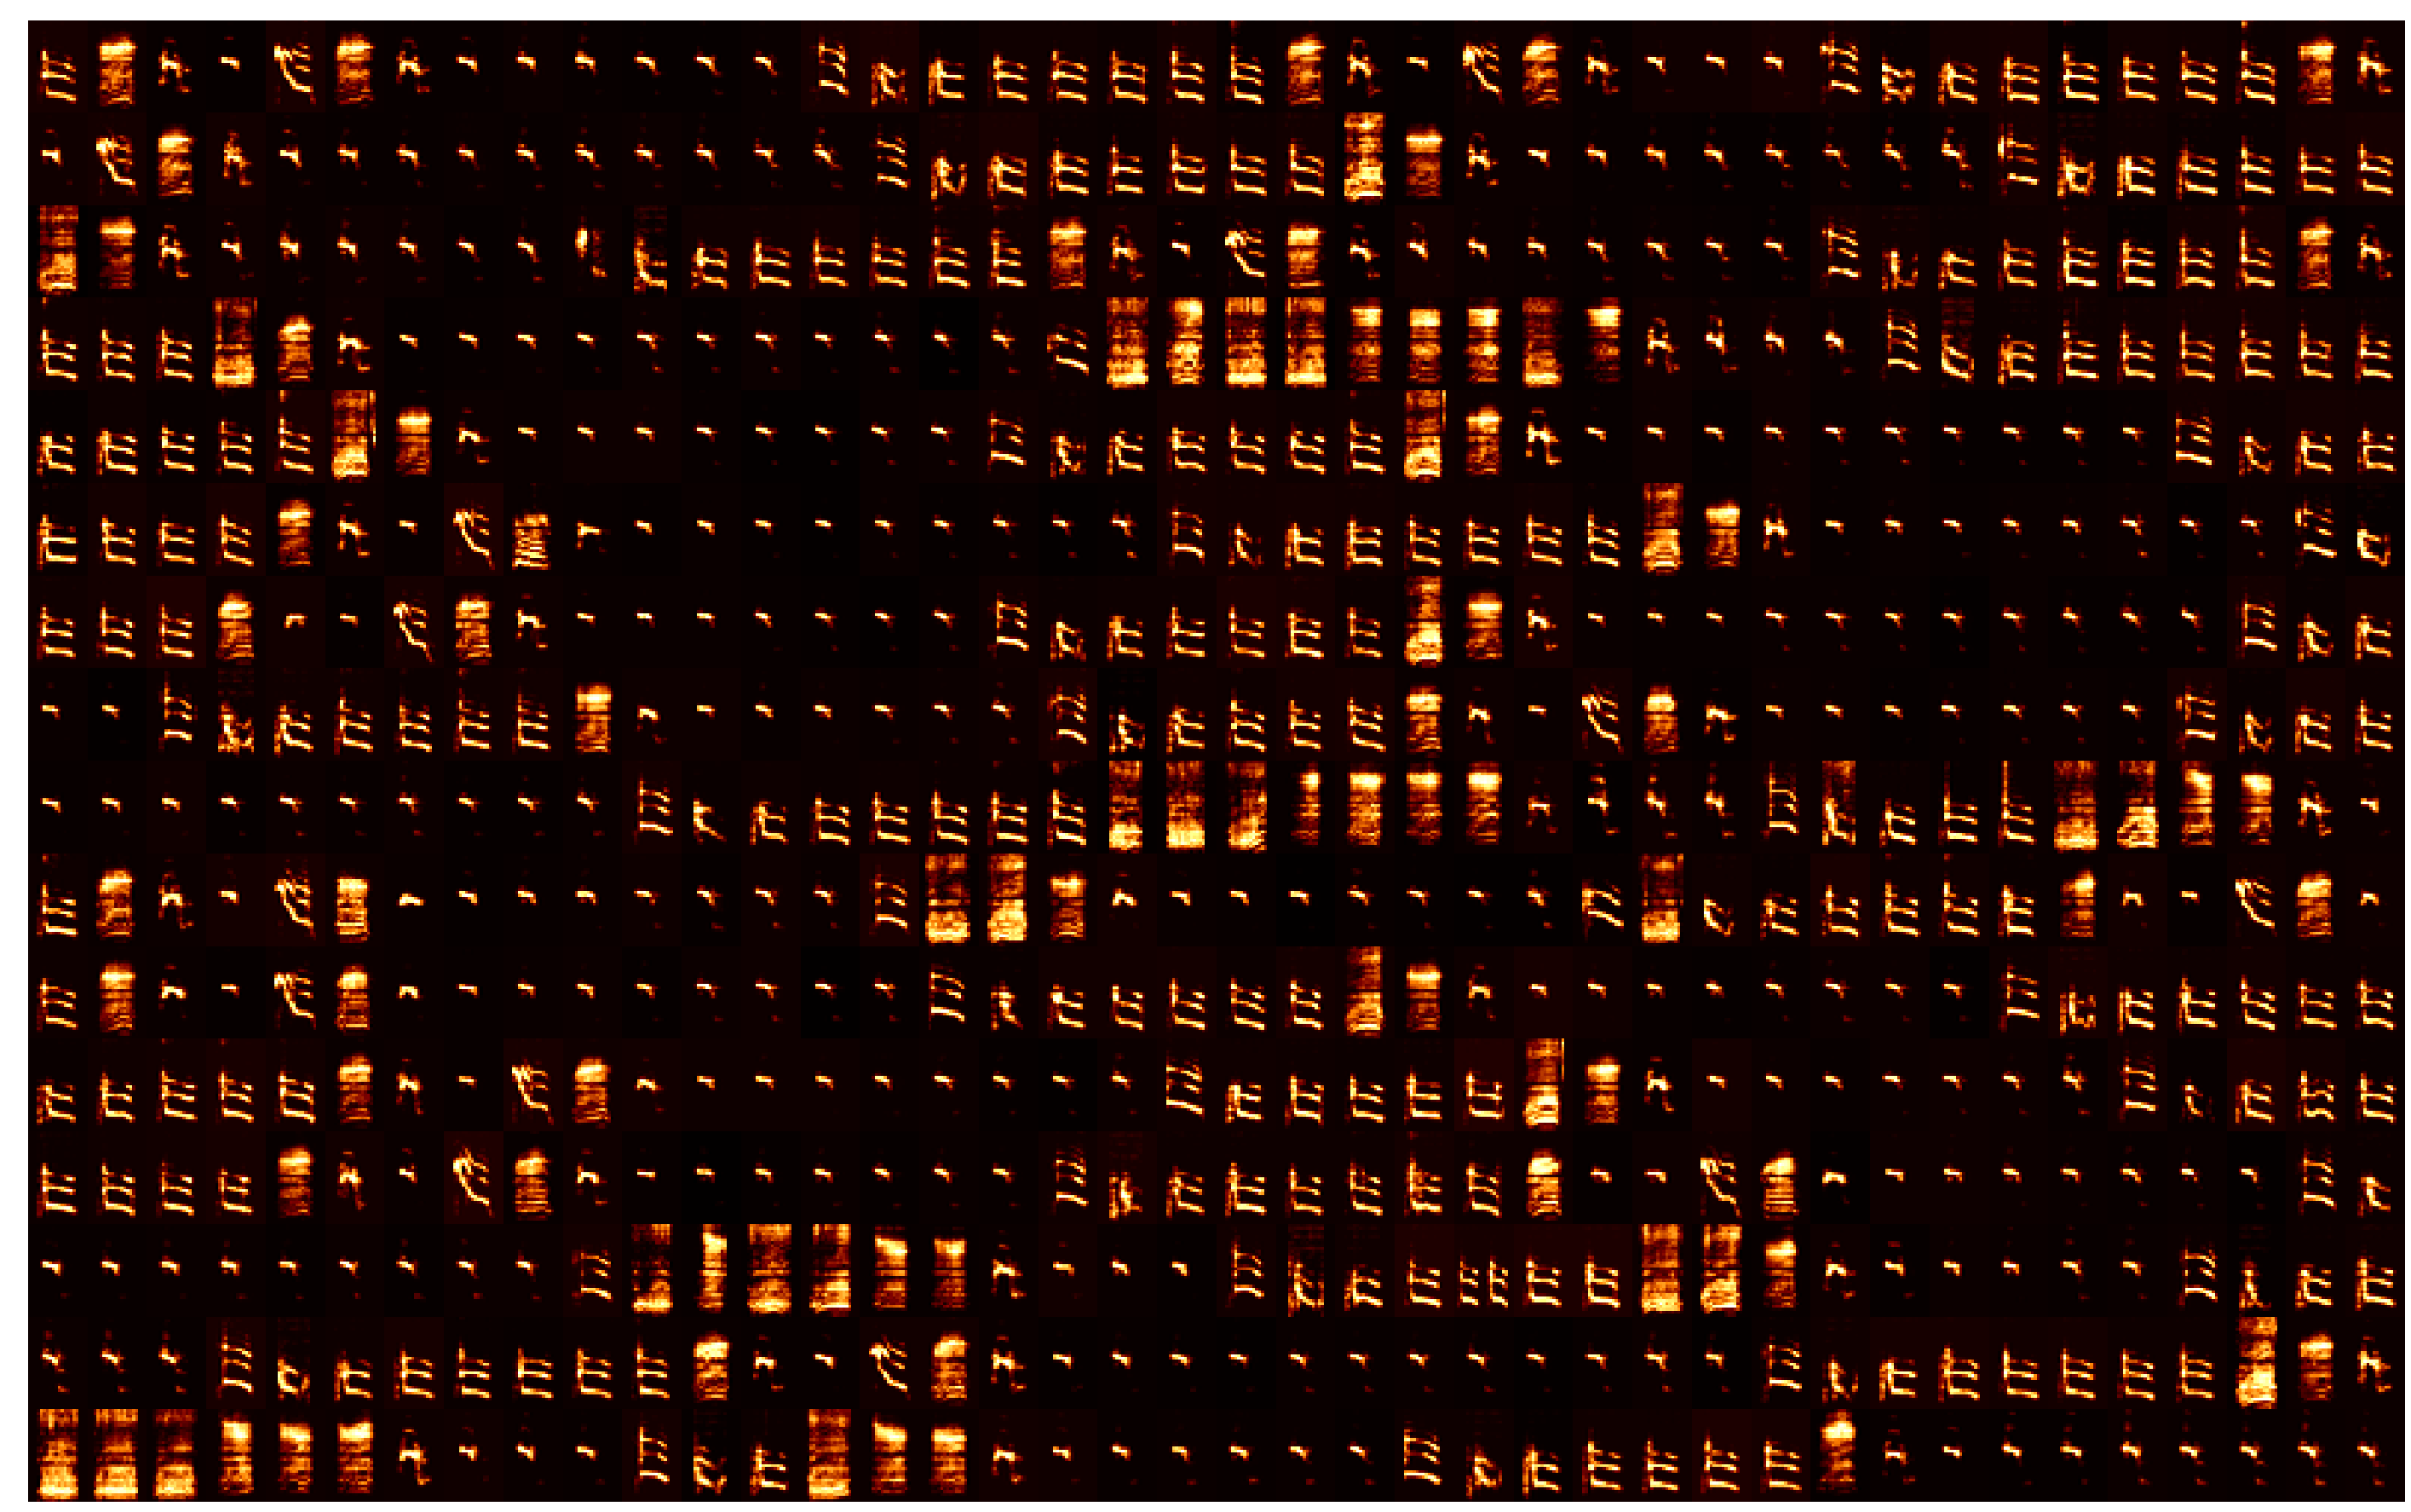

gr41rd51 52788


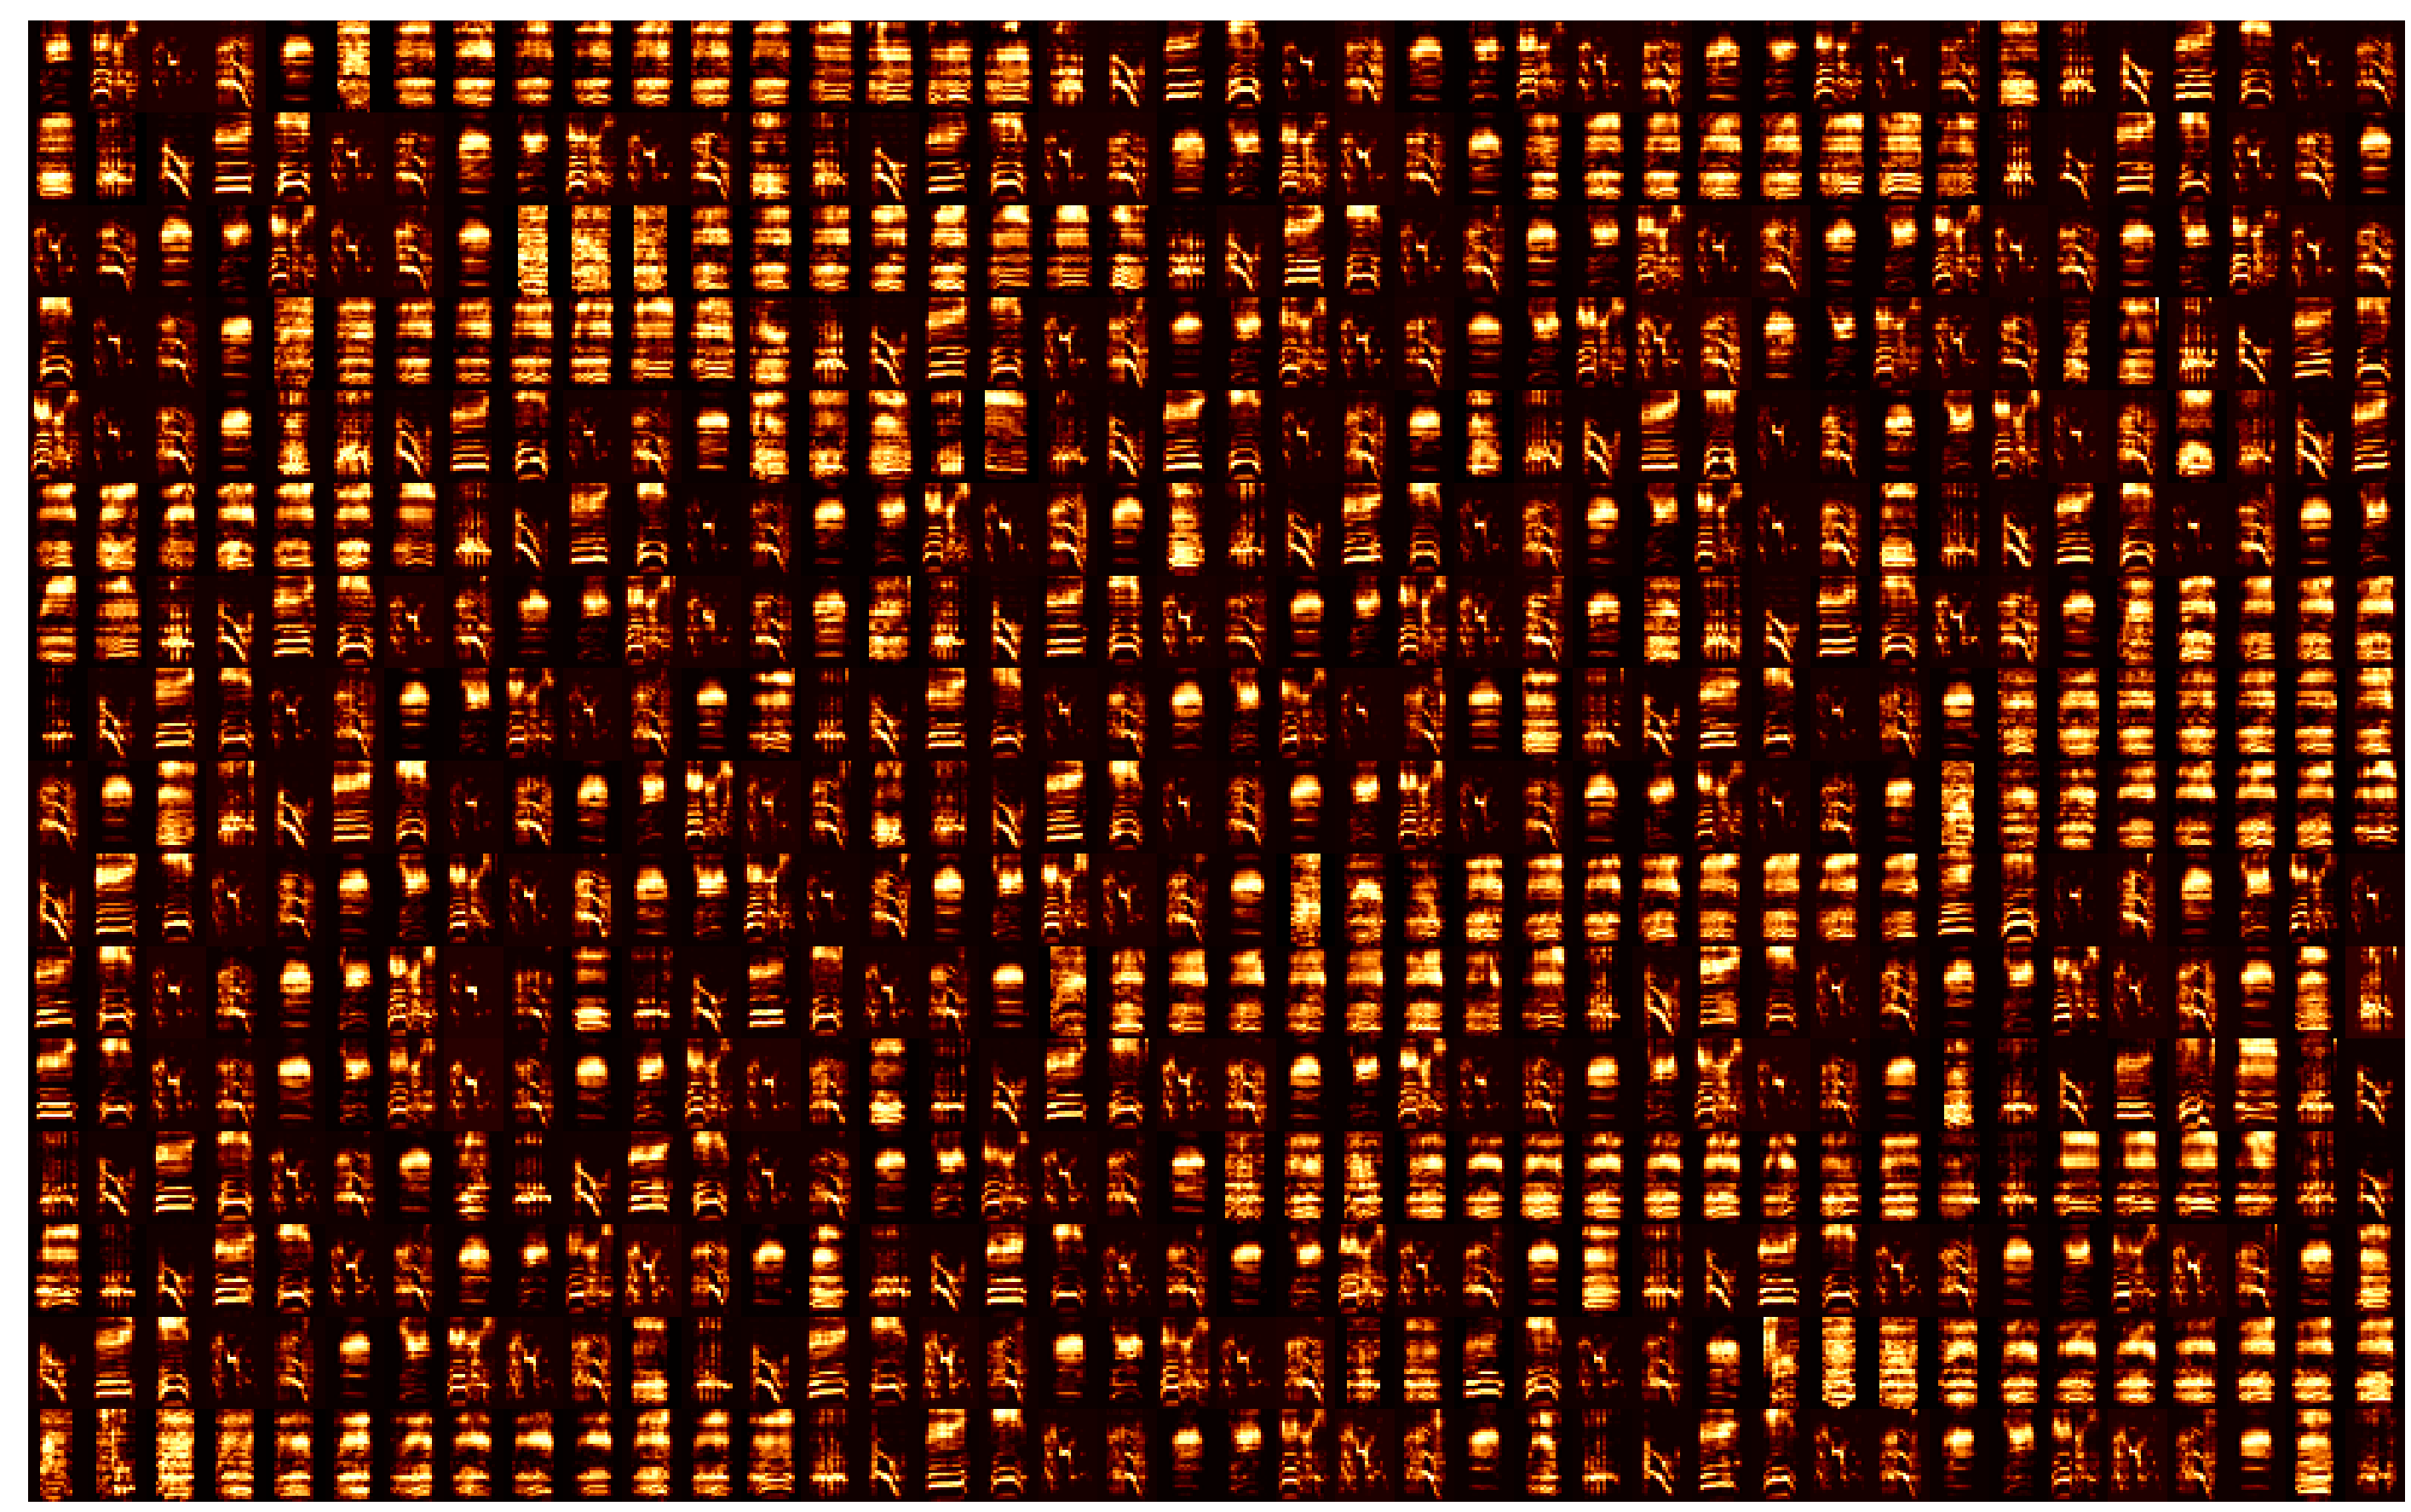

gy6or6 56375


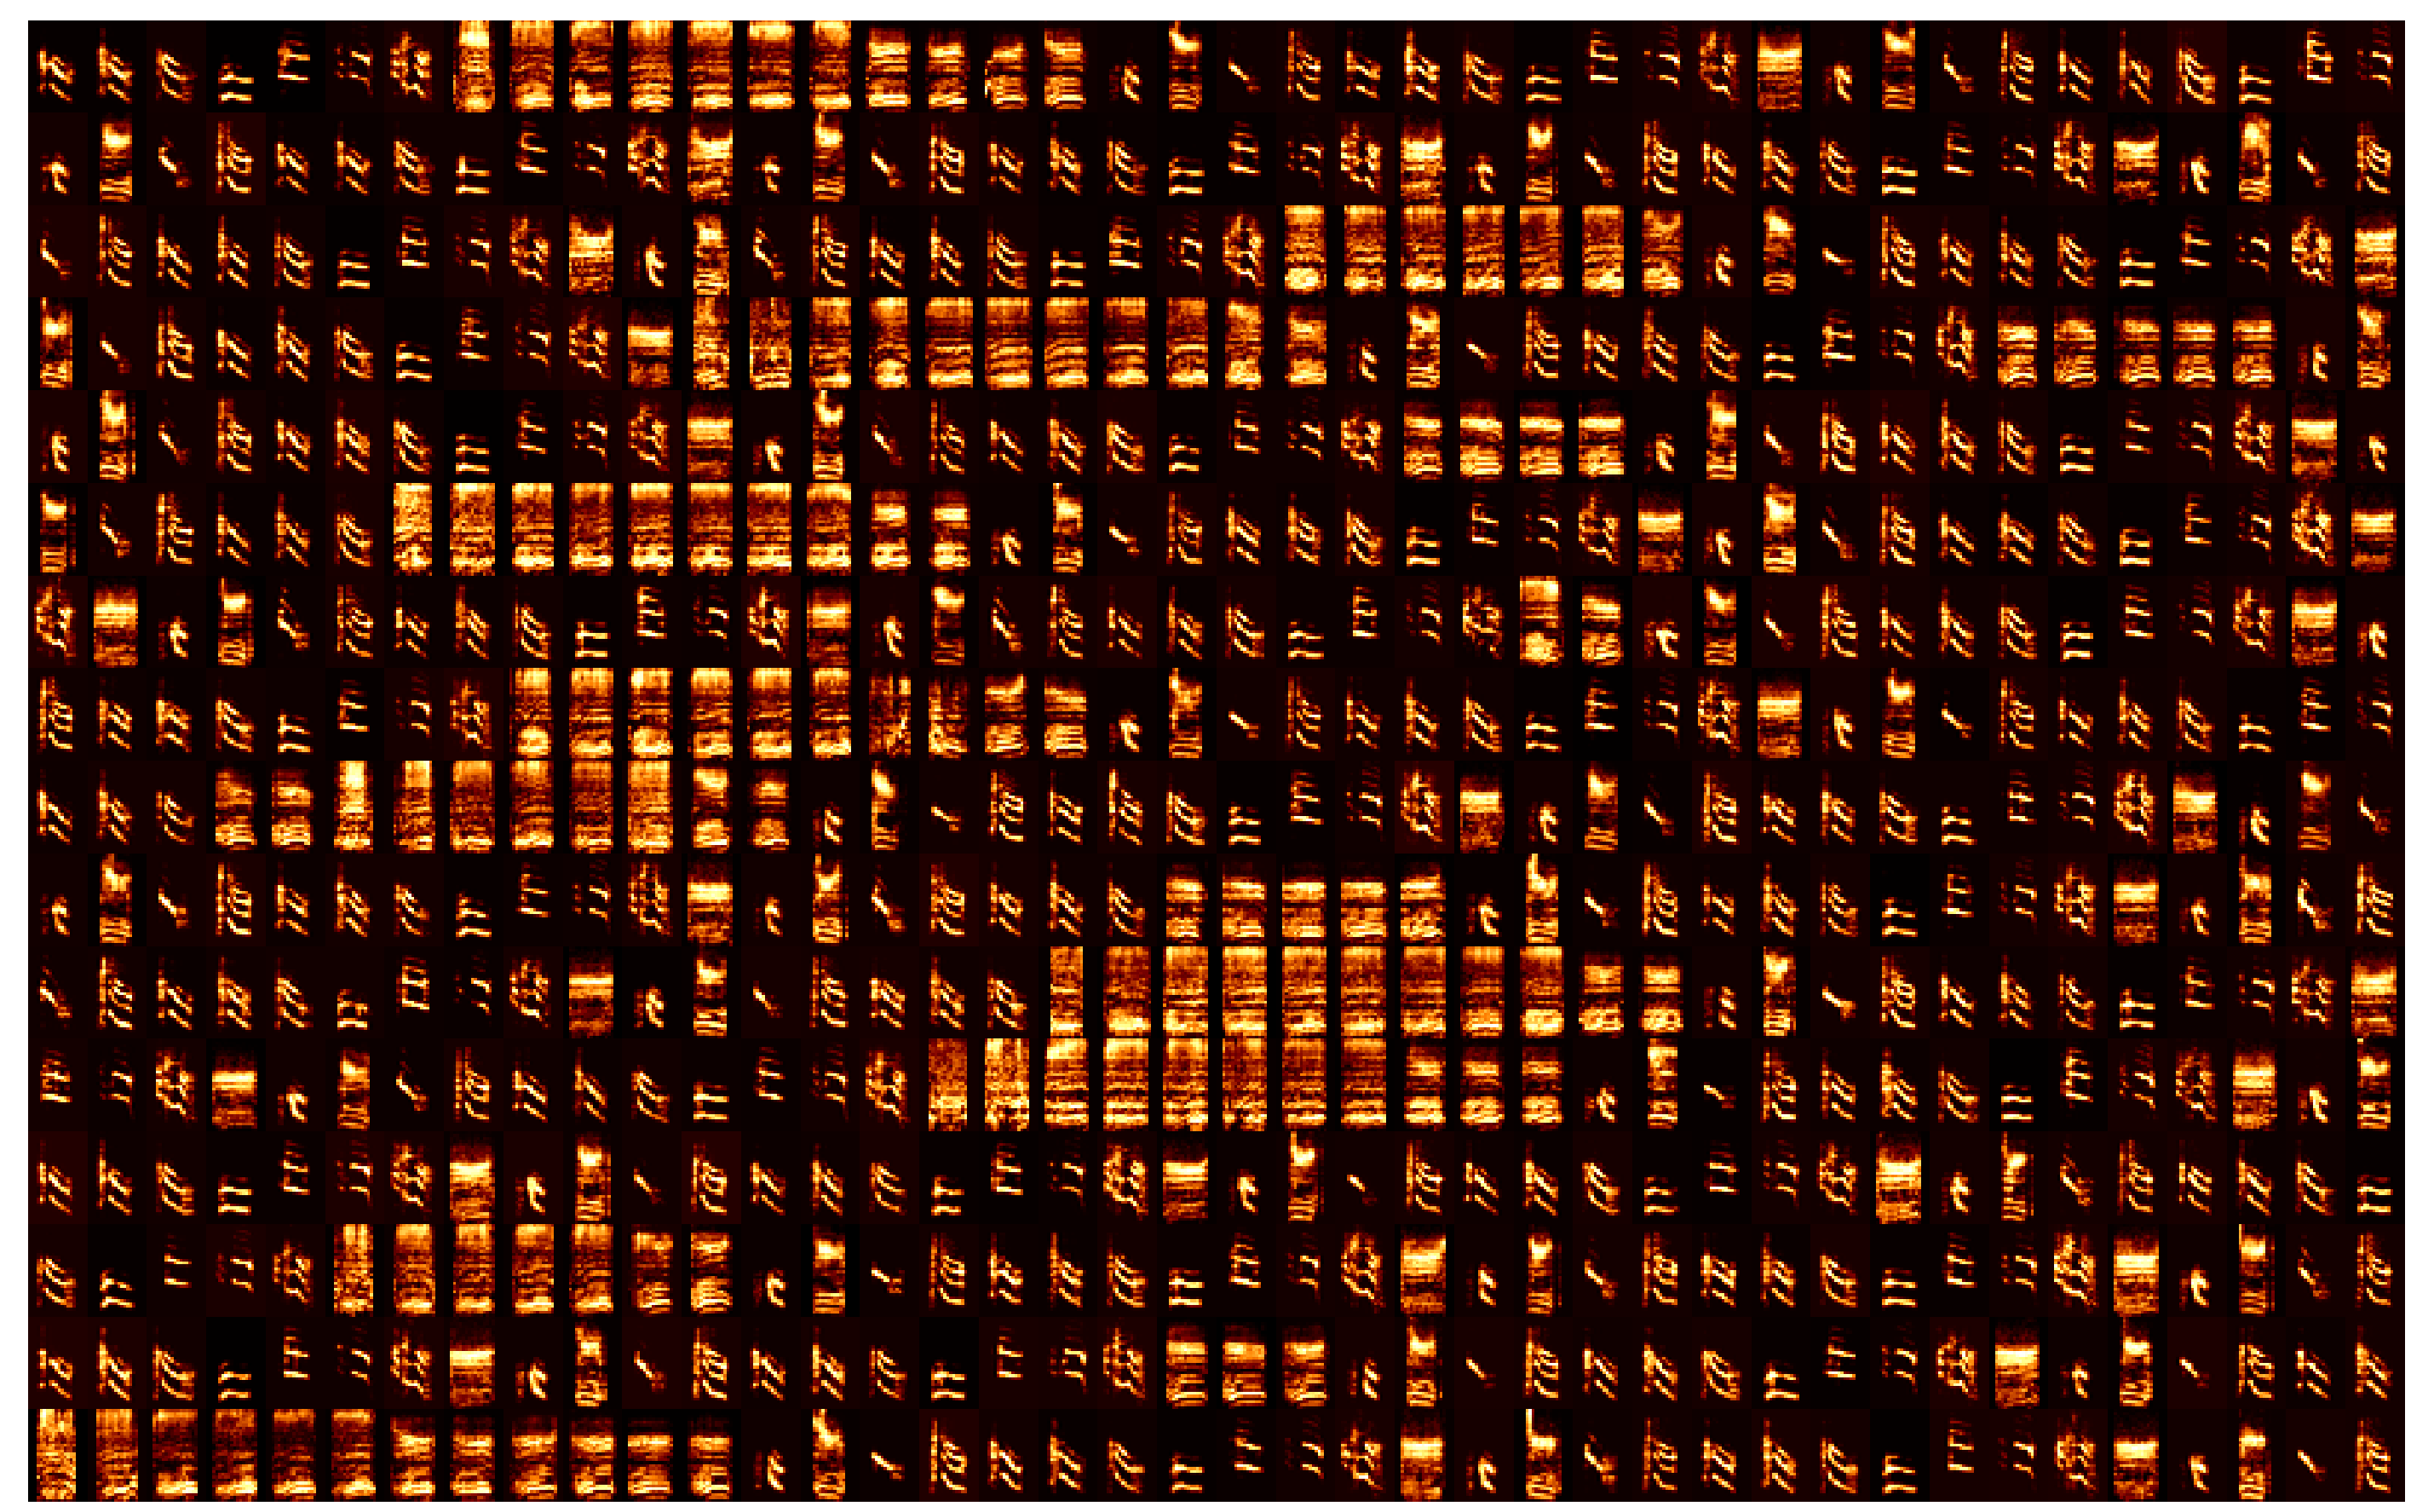

or60yw70 35799


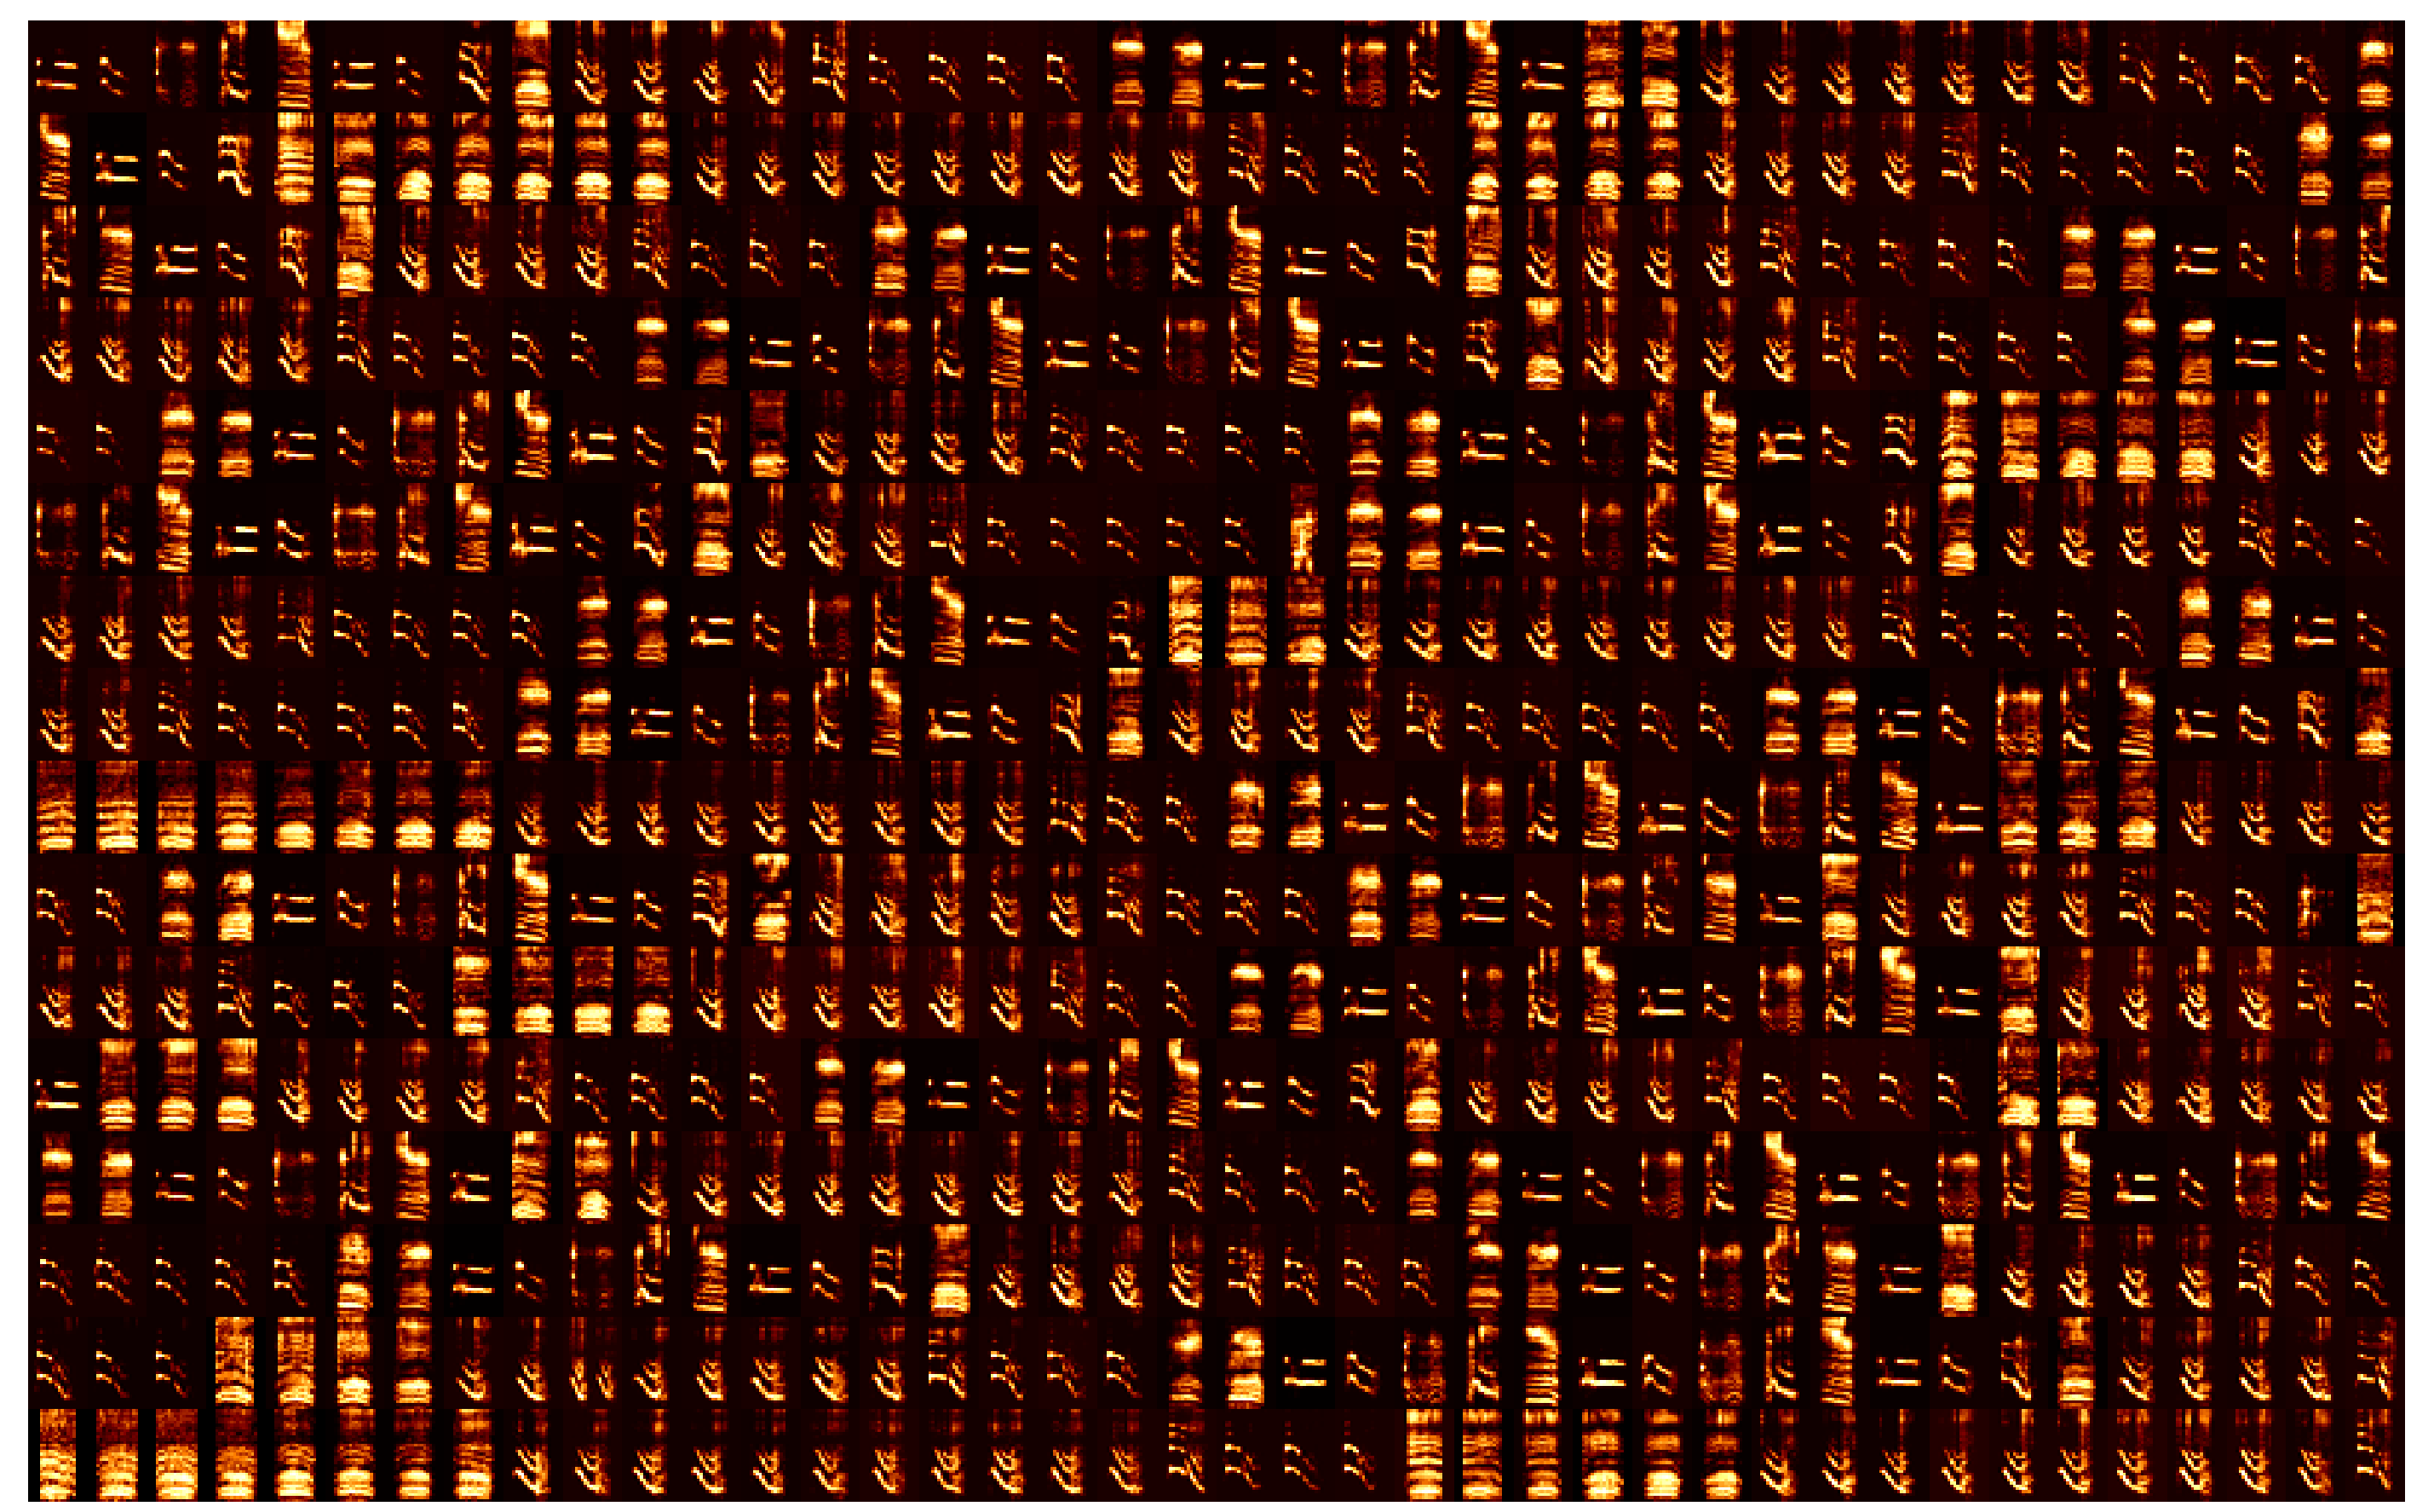

In [38]:
for indv in np.sort(syllable_df.indv.unique()):
    print(indv, np.sum(syllable_df.indv == indv))
    specs = np.array([i/np.max(i) for i in syllable_df[syllable_df.indv == indv].spectrogram.values])
    specs[specs<0] = 0
    draw_spec_set(specs, zoom=2,
                  maxrows=16, 
                  colsize=25)

### save dataset

In [39]:
save_loc = DATA_DIR / 'syllable_dfs' / DATASET_ID / 'bf.pickle'
ensure_dir(save_loc)
syllable_df.drop('audio', 1).to_pickle(save_loc)